# Auto MPG Dataset

## Step 1: Lode & Cleaning 
### 1.1 Define Column Names

In [ ]:
column_names = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]


### 1.2 Lode Dataset & Libraries

In [ ]:
import pandas as pd
auto_data = pd.read_csv(
    "auto-mpg.data-original",
    delim_whitespace=True,
    header=None,
    names=column_names,
    na_values="?"
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23476\4019713997.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_data = pd.read_csv(


### 1.3 Data Cleaning
#### 1.3.1 Check Null Values

In [ ]:
auto_data.isnull().sum()


mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### 1.3.2 Remove Null Values

In [ ]:
auto_data = auto_data.dropna()
auto_data["horsepower"] = auto_data["horsepower"].astype(float)
auto_data = auto_data.reset_index(drop=True)


## Step 2: Statistics
### 2.1 Basic Statistics

In [5]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### 2.2 Correlation Analysis

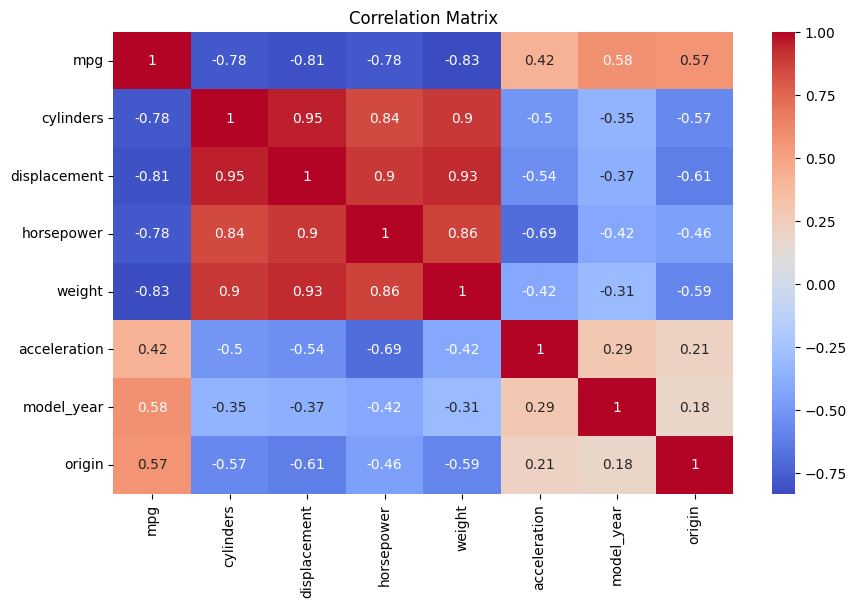

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(auto_data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### 2.3 Pair Plots

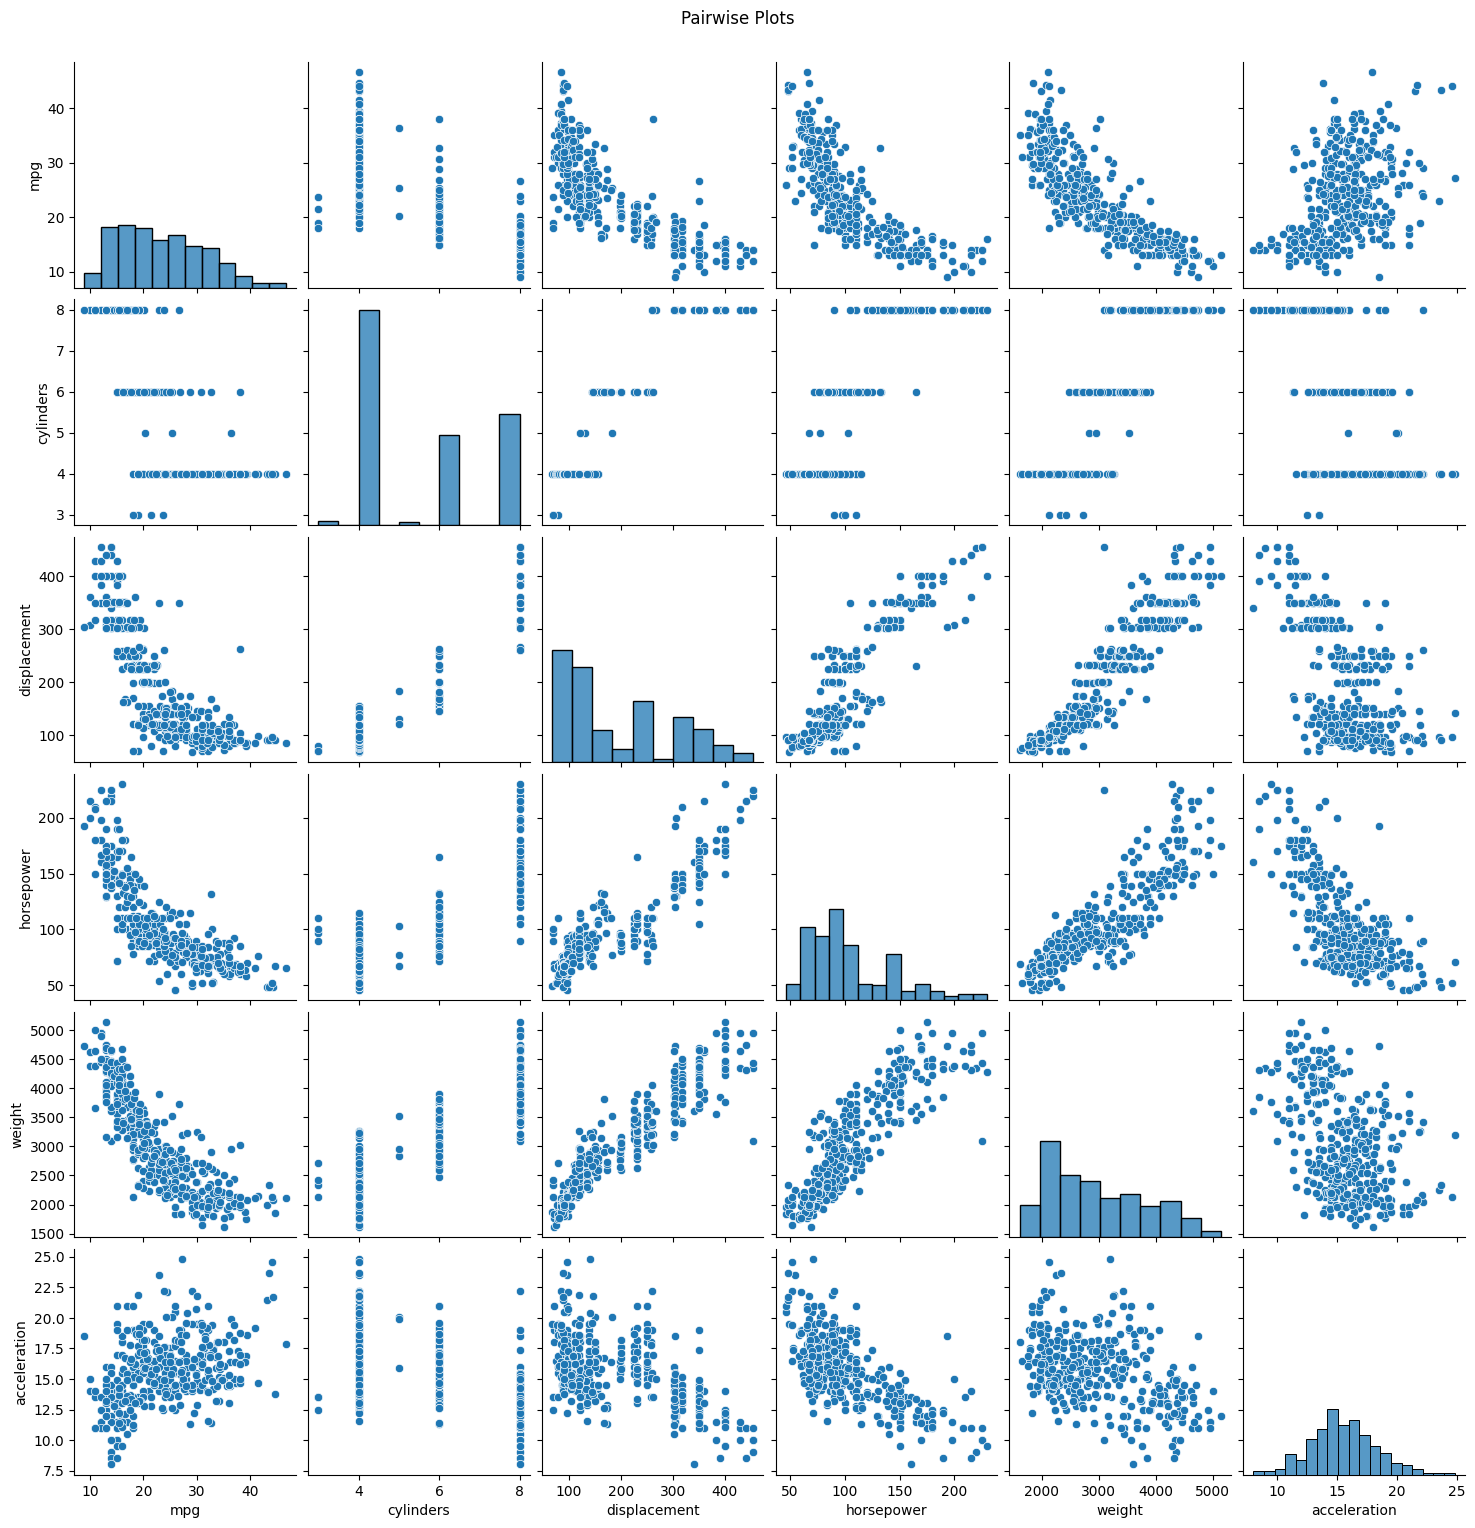

In [7]:
sns.pairplot(auto_data[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]])
plt.suptitle("Pairwise Plots", y=1.02)
plt.show()

## Step 3: Train and Test
### 3.1 Select Feature and Modle 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# create binary target for logistic regression
auto_data["mpg_binary"] = (auto_data["mpg"] > auto_data["mpg"].median()).astype(int)

X = auto_data[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]]
y = auto_data["mpg_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()


### 3.2 Model Training 

In [9]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

### 3.3 Plot the Regression Modle 

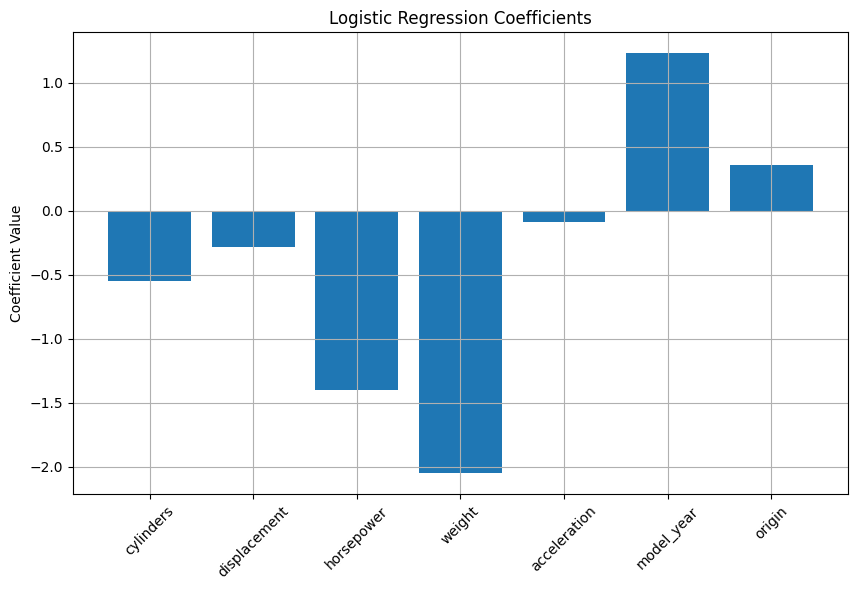

In [10]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_[0])
plt.xticks(rotation=45)
plt.title("Logistic Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### 3.4 Logistic Regression Model Prediction

In [11]:
y_pred_test = model.predict(X_test_scaled)

### 3.5 Making Prediction on the Training Dataset

In [12]:
y_pred_train = model.predict(X_train_scaled)

### 3.6 Modle Evaluation 

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print("Test Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        65
           1       0.79      1.00      0.88        53

    accuracy                           0.88       118
   macro avg       0.90      0.89      0.88       118
weighted avg       0.91      0.88      0.88       118

Confusion Matrix:
[[51 14]
 [ 0 53]]


### 3.7 Making Prediction on the Validation Dataset (Test Set)

In [14]:
print("First 10 Predictions on Test Set:", y_pred_test[:10])

First 10 Predictions on Test Set: [1 1 1 1 1 1 0 1 0 1]


### 3.8 Feature Importance 

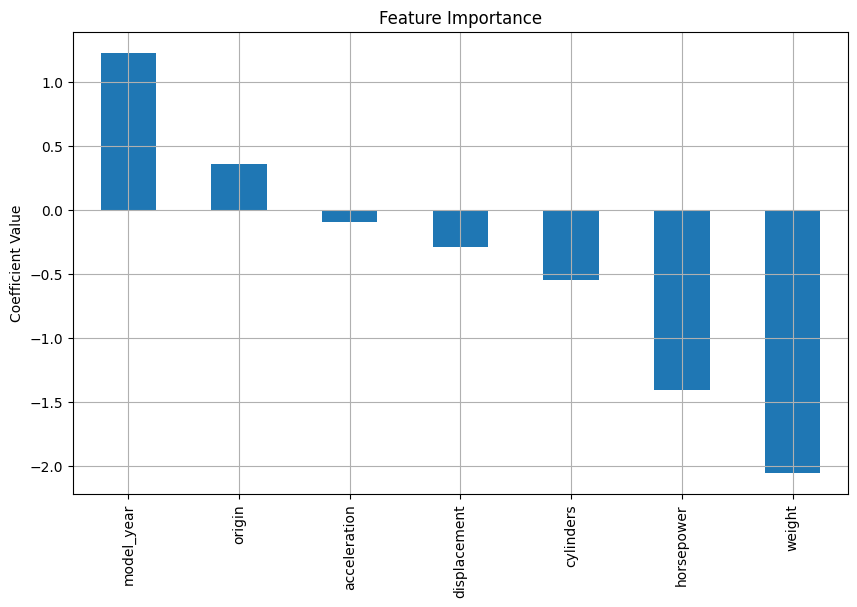

In [15]:
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 6), title="Feature Importance")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()
